In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import matplotlib.colors as mcolors
import pandas as pd
from numpy import genfromtxt
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 18})
import glob
import json

In [31]:
def jsonload(fname):
    with open(fname) as jsonfile:
        try:
            return json.load(jsonfile)
        except Exception:
            print(fname)

In [37]:
fdir = "/Users/alexcampbell/documents/research/Fermilab"
fnames = list(np.sort(glob.glob(f"{fdir}/test_json.json")))
all_files = fnames.copy()

In [38]:
data = [jsonload(fname) for fname in fnames]

In [49]:
locks = np.array(data[0]['tests'][0]['metadata']['locks'])
auto_vco = data[0]['tests'][1]['metadata']['auto_vco']
auto_locks = data[0]['tests'][1]['metadata']['auto_locks']
frequencies_used = data[0]['tests'][1]['metadata']['frequencies_used']

In [50]:
## Set some variables
allowed_cap_bank_vals=np.array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                              13,  14,  15,  24,  25,  26,  27,  28,  29,  30,  31,  56,  57,
                              58,  59,  60,  61,  62,  63, 120, 121, 122, 123, 124, 125, 126,
                              127, 248, 249, 250, 251, 252, 253, 254, 255, 504, 505, 506,       507,
                              508, 509, 510, 511])

capSettings = np.zeros(len(auto_vco))
a = [] ## list of cap settings where it locks
b = [] ## list of frequencies that correspond to a


for i in range (len(auto_vco)):
    for j in range(56):
        if auto_vco[i] == allowed_cap_bank_vals[j]:
            capSettings[i] = j

for i in range(len(auto_vco)):
    if auto_locks[i] == 1:
        a.append(capSettings[i])
        b.append(frequencies_used[i])

x = np.array(a)
y = np.array(b)


<Figure size 720x720 with 0 Axes>

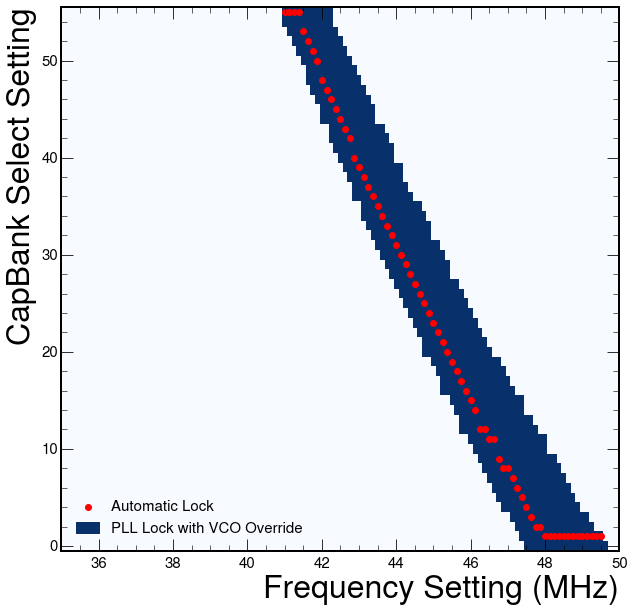

<Figure size 720x720 with 0 Axes>

In [53]:
## Make the plots
scale = 8
b,a=np.meshgrid(np.arange(34,(50+(1/8)),(1/scale)),np.arange(56))
plt.hist2d(b.flatten(),a.flatten(),weights=locks.T.flatten(),bins=(np.arange(34,(51+(1/8)),(1/scale))-(0.5/scale),np.arange(57)-0.5),cmap='Blues', label ="PLL Lock")
plt.scatter((y/8),x,color="red",label="Automatic Lock")
#plt.colorbar().set_label(label='PLL Locking Status',size=32)
handles, labels = plt.gca().get_legend_handles_labels()
patch = mpatches.Patch(color='#08306b', label='PLL Lock with VCO Override')
handles.append(patch) 

plt.legend(handles=handles, loc='lower left')
plt.xlabel('Frequency Setting (MHz)', size=32)
plt.ylabel('CapBank Select Setting', size=32)
#plt.title(f"ECON-D-P1 Board {boardNum} PLL Scan")
plt.xlim([35,50])
plt.savefig(f'./econ-2D.png',dpi=300, facecolor = "w")
plt.figure()